In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import metrics

Loading the data

In [2]:
dataset = pd.read_csv("bank-additional-full.csv", sep=';')
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Function to calculate the accuracy and print it

In [4]:
def classifier(clf, x_train,x_test,y_train,y_test):
    y_test_pred = clf.predict(x_test)
    y_train_pred = clf.predict(x_train)

    accuracy_test = accuracy_score(y_test,y_test_pred)
    accuracy_train =  accuracy_score(y_train,y_train_pred)
    
    
    print('Train accuracy is:',accuracy_train )
    print('Test accuracy is:',accuracy_test )
    print()

Checing highly co-related column

In [5]:
corr = dataset.corr()
corr_greater_than_8 = corr[corr>=.8]
corr_greater_than_8

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pdays,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
previous,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
emp.var.rate,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.972245,0.906970
cons.price.idx,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
cons.conf.idx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
euribor3m,NaN,NaN,NaN,NaN,NaN,0.972245,NaN,NaN,1.000000,0.945154
nr.employed,NaN,NaN,NaN,NaN,NaN,0.906970,NaN,NaN,0.945154,1.000000


Visualising by heatmap

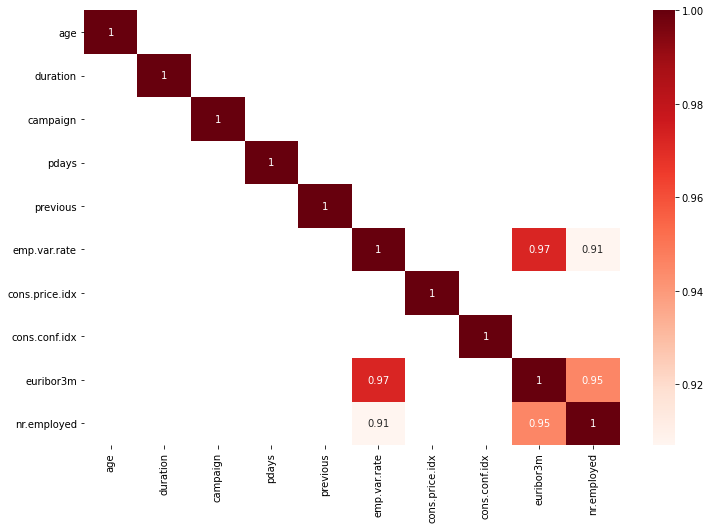

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_greater_than_8, cmap="Reds", annot = True);

In [7]:
dataset.drop(columns=['euribor3m', 'nr.employed'],inplace=True)

In [8]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,no


Converting categorical into boolean using get_dummies 

Getting the predicted values in terms of 0 and 1

In [9]:
dataset['y'] = dataset['y'].apply(lambda x: 0 if x=='no' else (1 if x=='yes' else -1))

Dropping duplicates and irrelevant columns

In [10]:
dataset.drop_duplicates(inplace=True)
dataset.drop(['day_of_week', 'contact', 'month'], axis=1, inplace = True)

In [11]:
dataset.head()

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y
0,56,housemaid,married,basic.4y,no,no,no,261,1,999,0,nonexistent,1.1,93.994,-36.4,0
1,57,services,married,high.school,unknown,no,no,149,1,999,0,nonexistent,1.1,93.994,-36.4,0
2,37,services,married,high.school,no,yes,no,226,1,999,0,nonexistent,1.1,93.994,-36.4,0
3,40,admin.,married,basic.6y,no,no,no,151,1,999,0,nonexistent,1.1,93.994,-36.4,0
4,56,services,married,high.school,no,no,yes,307,1,999,0,nonexistent,1.1,93.994,-36.4,0


encoding for categorical features (One-Hot Encoding)

In [12]:
dataset  = pd.get_dummies(dataset, drop_first = True)

In [13]:
dataset.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,y,job_blue-collar,...,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,0,0,...,0,0,0,0,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,0,0,...,0,0,1,0,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,0,0,...,0,0,0,0,0,1,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,0,0,...,0,0,0,0,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,0,0,...,0,0,0,0,0,0,0,1,1,0


In [14]:
dataset.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'y', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

## Splitting the dataset into train and test datasets

In [15]:
x = dataset.drop("y", axis=1)
y = dataset['y']
x.sample()

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Since we used the get_dummies the categorical attributes became in the shape of sparse matrix, and it doesn't make sense to keep track of unknown columns so we want to randomize the unknown values.

This function does exactly that, it removes the unknown column of the sparse matrix and give its value to a random column of the same attribute

for example we will remove 'job_unknown' and give its value to a random column from the sparse matrix of unique values of the attribute 'job'

In [16]:
def randomize_unknown(list_name,df):
    np.random.seed(0)
    col_list = list(df.columns)
    for name in list_name:
        ##Getting the original column name before the *get_dummy*
        og_name = name.split('_')[0]
        ##Making a list to get the rows in which the unknown value was present
        unknown_index=df.index[df[name]==1].tolist()
        ##Getting a list containing the column names after the *get_dummy*
        options =[]
        for i in col_list:
            if i.startswith(og_name):
                options.append(i)
        options.remove(name)
        ##Setting the 0 value of the random attribute to 1 which means it is now the new randomized value of the unknown
        options_idx = [x for x in range(len(options))]
        for j in unknown_index:
            df.at[j,options[np.random.choice(options_idx)]] = 1
    ##Dropping the unknown column
    df.drop(columns=list_name,inplace=True)
    return df


In [17]:
randomize_unknown(['job_unknown','marital_unknown','education_unknown','housing_unknown','loan_unknown','poutcome_nonexistent','default_unknown'],x_train)
x_test.drop(columns=['job_unknown','marital_unknown','education_unknown','housing_unknown','loan_unknown','poutcome_nonexistent','default_unknown'],inplace=True)

In [18]:
#object for standarization
s = StandardScaler()

In [19]:
num_list = ['age', 'duration', 'campaign', 'previous', 'emp.var.rate','cons.price.idx', 'cons.conf.idx']

Getting numerical attributes to make transformation because it doesn't make since to scale dummy attribute

We will perform scalling only on numerical attributes

In [20]:
x_train_cat = x_train.drop(columns=num_list)
x_test_cat = x_test.drop(columns=num_list)

In [21]:
cat_list = list(x_train_cat.columns)

In [22]:
x_train_num = x_train[num_list].copy()
x_test_num = x_test[num_list].copy()

scalling on training set and transforming it to testing set

In [23]:
x_train_num = s.fit_transform(x_train_num)
x_test_num = s.transform(x_test_num)

In [24]:
x_train_all = np.c_[x_train_num,x_train_cat.values]
x_test_all = np.c_[x_test_num,x_test_cat.values]

In [25]:
x_train_all_df = pd.DataFrame(x_train_all, columns = num_list + cat_list)
x_test_all_df = pd.DataFrame(x_test_all, columns = num_list +cat_list)

Just for testing before tunning the k value

In [26]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train_all_df, y_train)

classifier(knn, x_train_all_df,x_test_all_df, y_train,y_test)

Train accuracy is: 0.9391317547055252
Test accuracy is: 0.8971463266545234



## Tuning the hyper perameters
## For finding the best K

In [27]:
error_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit( x_train_all_df, y_train)
    pred_i = knn.predict(x_test_all_df)
    error_rate.append(np.mean(pred_i != y_test))

acc = []
for i in range(1,50):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train_all_df, y_train)
    yhat = neigh.predict(x_test_all_df)
    acc.append(metrics.accuracy_score(y_test, yhat))
    

## Visualising the error rate

Minimum error:  0.0936247723132969 at K = 25


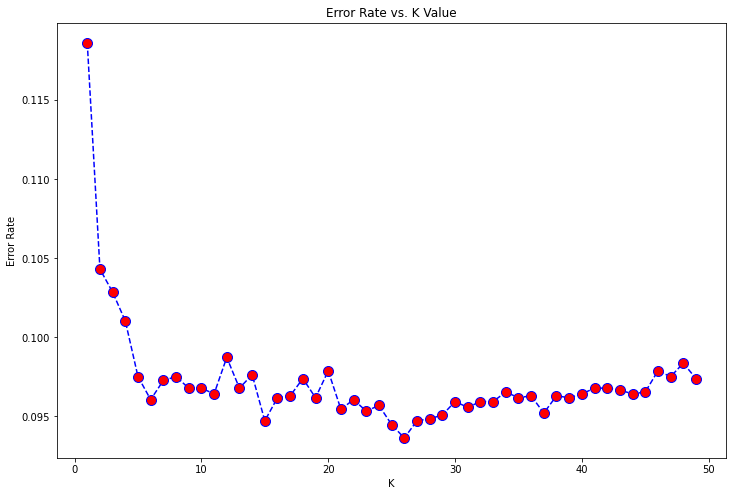

In [28]:
plt.figure(figsize=(12,8))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error: ",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Visualizing the accuracy for k values to pick the best k value

Maximum accuracy:  0.9063752276867031 at K = 25


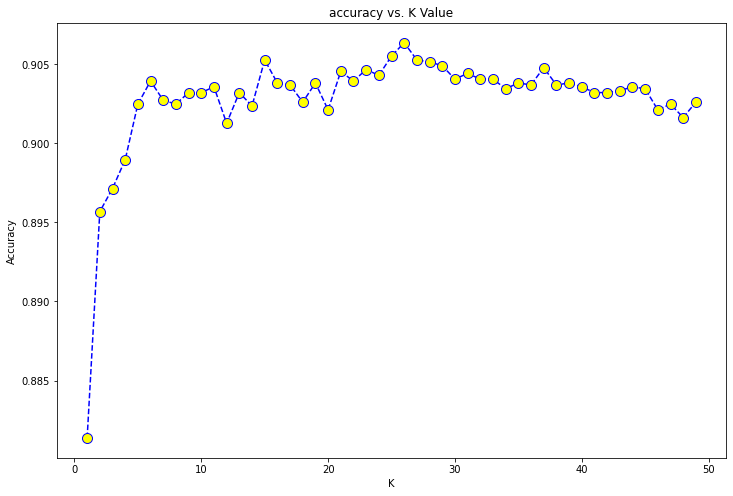

In [29]:
plt.figure(figsize=(12,8))
plt.plot(range(1,50),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='yellow', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy: ",max(acc),"at K =",acc.index(max(acc)))
k = acc.index(max(acc))

Modeling the K gives least error and high accuracy

In [30]:
knn = KNeighborsClassifier(n_neighbors = k+1)
knn.fit( x_train_all_df, y_train)

classifier(knn, x_train_all_df,x_test_all_df,y_train,y_test)

Train accuracy is: 0.9106860959319976
Test accuracy is: 0.9063752276867031



In [31]:
from sklearn.metrics import plot_confusion_matrix


C:\Users\Snox\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


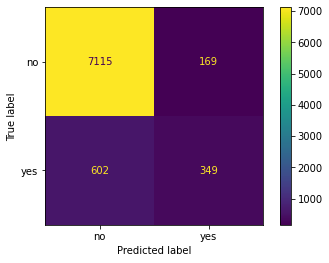

In [32]:
#Plotting confusion matrix of test data
plot_confusion_matrix(knn,x_test_all_df,y_test,display_labels=['no','yes']);

<h1>ACCURACY = 90.6375 %</h1>